In [16]:
import pandas as pd
data = pd.read_csv("diabetes.csv")
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
col_names = ['Pregn', 'Glucose', 'Bp', 'Skin', 'Insulin', 'BMI', 'Pedigree', 'Age', 'Label']
data = pd.read_csv("diabetes.csv", names=col_names)
data=data.iloc[1:,:]
data.head(5)

,Pregn,Glucose,Bp,Skin,Insulin,BMI,Pedigree,Age,Label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [18]:
# Features
from sklearn.model_selection import train_test_split
# Features seelection, target
feature_cols = ['Pregn', 'Glucose', 'Bp', 'Skin', 'Insulin', 'BMI', 'Pedigree', 'Age']
X = data[feature_cols]
y = data.Label
#split data 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [19]:
#import libraries
from sklearn.tree import DecisionTreeClassifier
#create the Decision Tree Classifier model
model = DecisionTreeClassifier()
# Train Decision Tree Classifer
model = model.fit(X_train,y_train)

In [20]:
#predict
y_pred = model.predict(X_test)

In [21]:
# import libraries
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm= confusion_matrix(y_test,y_pred)
print("cm:",cm)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

cm: [[118  28]
 [ 37  48]]
Accuracy: 0.7186147186147186


In [22]:
#model = DecisionTreeClassifier()
#model = model.fit(X_train,y_train)

In [23]:
model2 = DecisionTreeClassifier(criterion="entropy", max_depth=3)
model2 = model2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)
cm= confusion_matrix(y_test,y_pred2)
print("cm:",cm)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

cm: [[124  22]
 [ 31  54]]
Accuracy: 0.7186147186147186


In [24]:
import os
os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [25]:
# import libraries
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

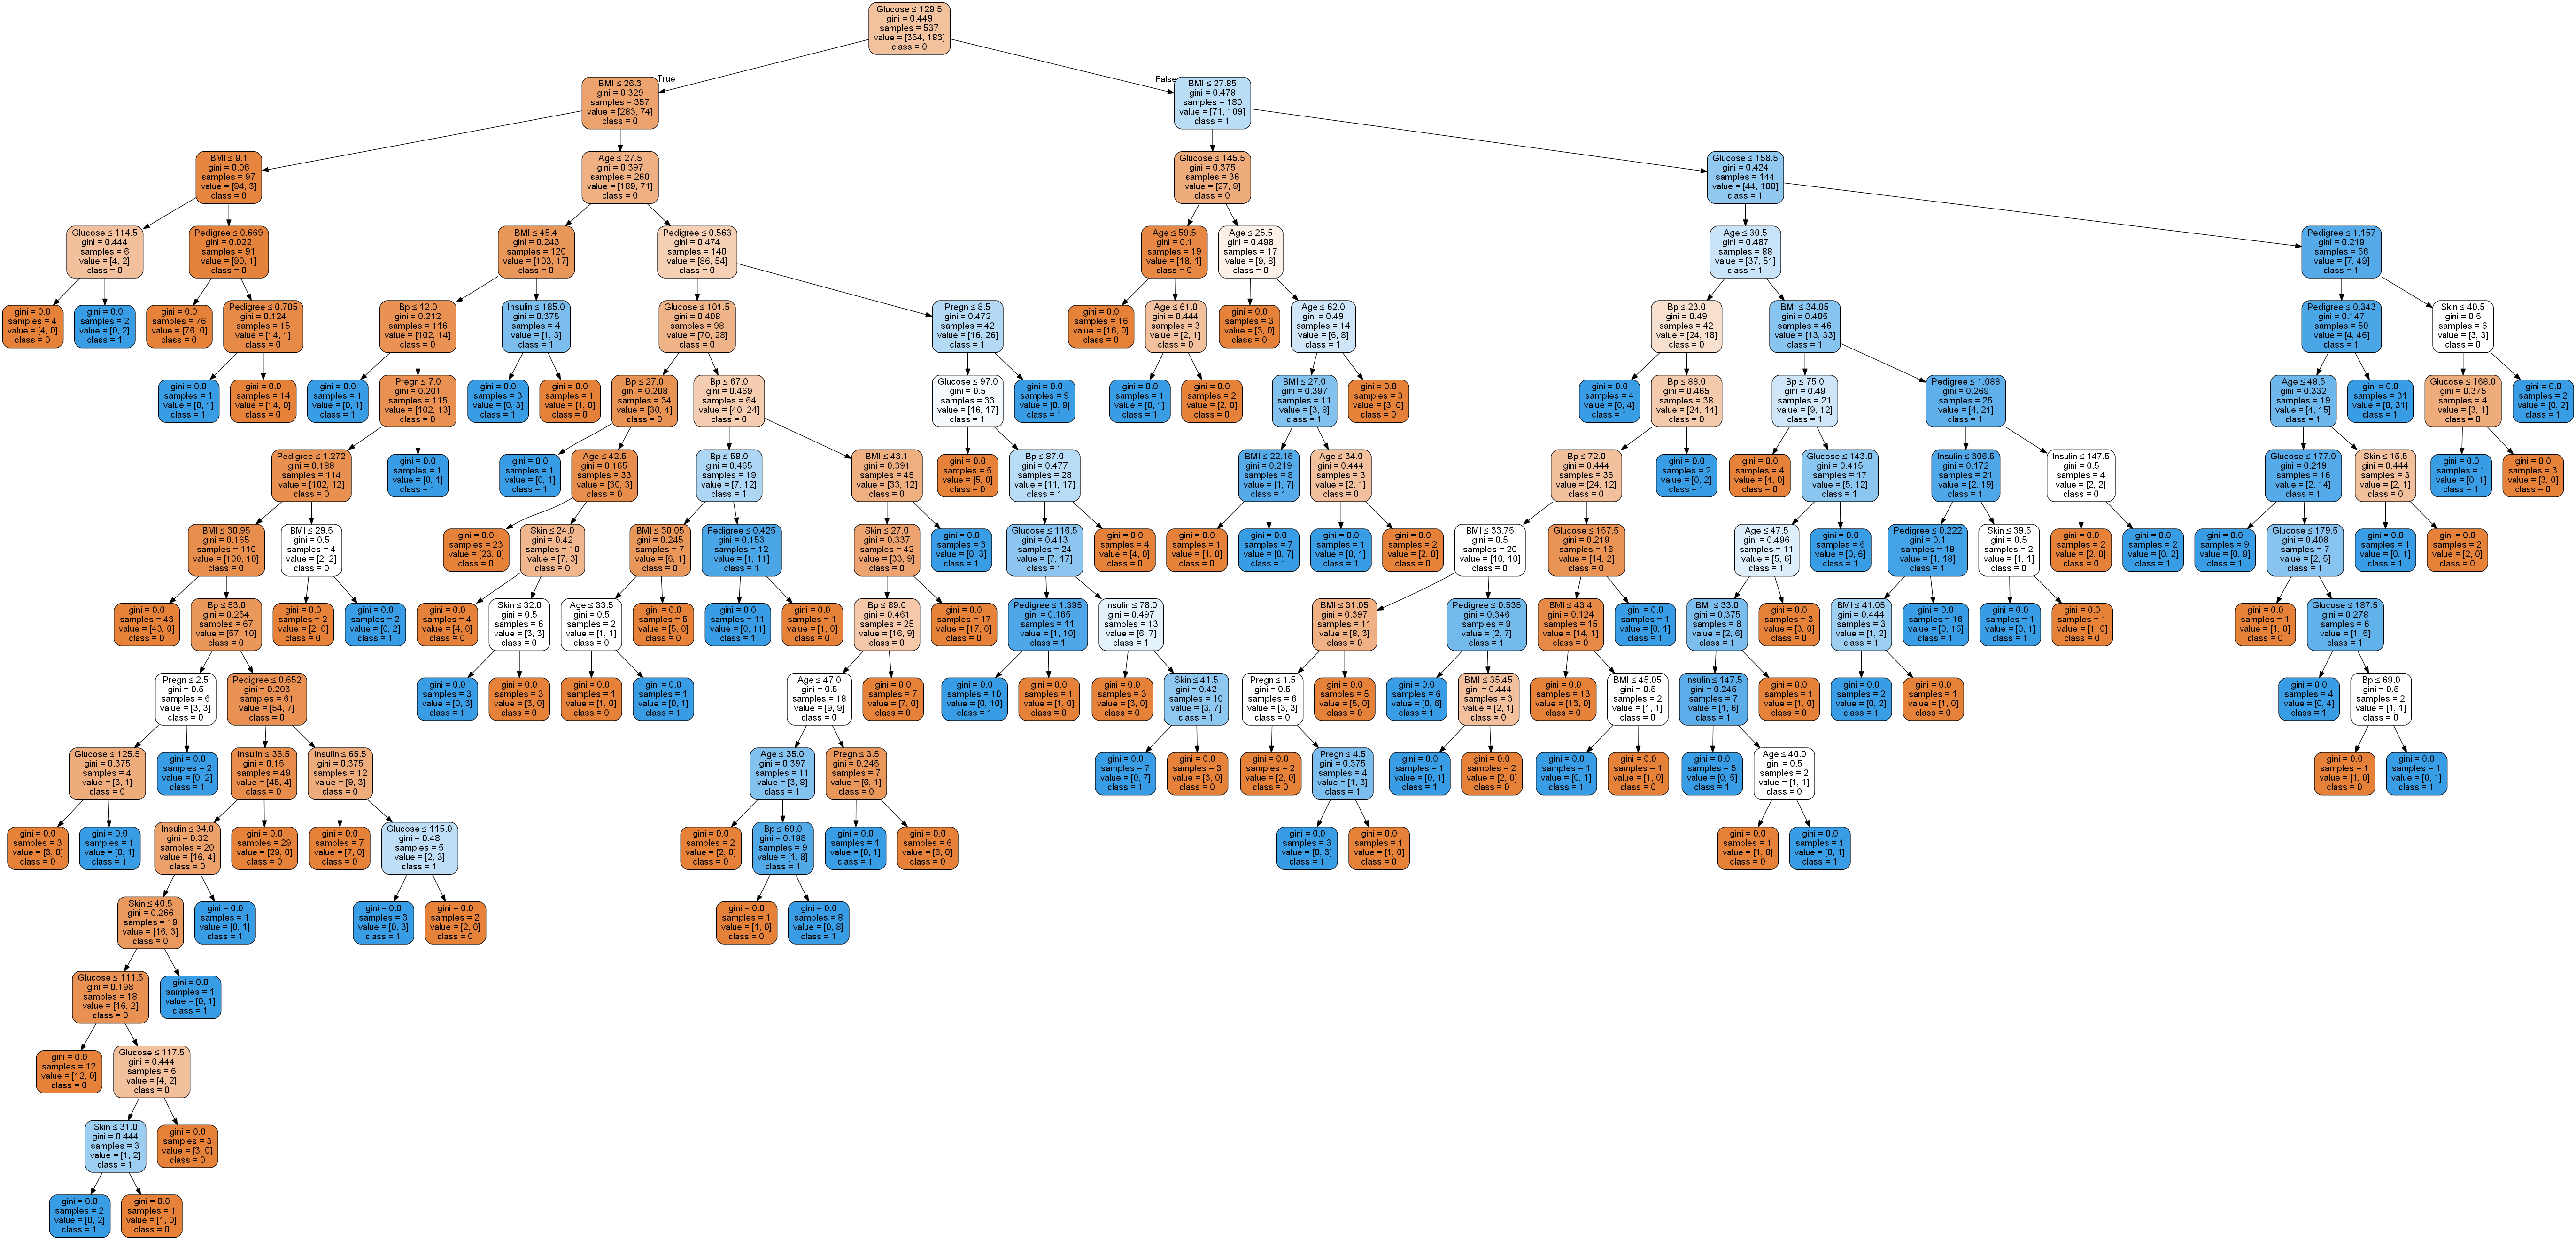

In [26]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [27]:
# N=0, I=1, O=2
X=[[0,1,0],
  [1,1,1],
  [0,0,2],
  [1,1,0],
  [1,1,2],
  [1,0,0],
  [0,0,2],
  [0,1,1],
  [0,0,0]]
feature_cols=["T1","T2","T3"]
X = pd.DataFrame(X,columns=feature_cols)
y = [0,0,1,0,0,0,1,0,1]
X

,T1,T2,T3
0,0,1,0
1,1,1,1
2,0,0,2
3,1,1,0
4,1,1,2
5,1,0,0
6,0,0,2
7,0,1,1
8,0,0,0


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

In [29]:
#create the Decision Tree Classifier model
model = DecisionTreeClassifier()
# Train Decision Tree Classifer
model = model.fit(X_train,y_train)
model.predict([[1,0,1]])

array([0])

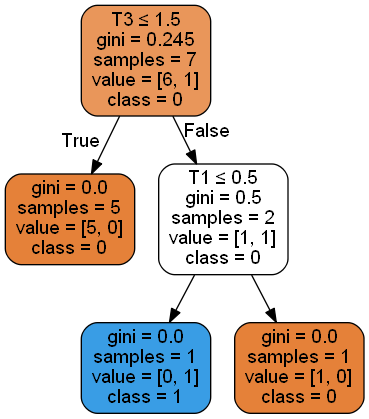

In [30]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())